<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


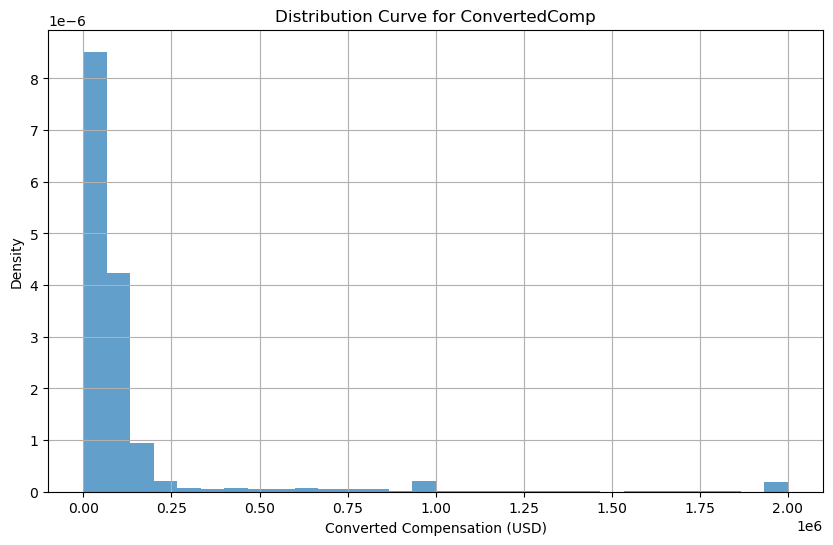

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, density=True, alpha=0.7)
plt.title('Distribution Curve for ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


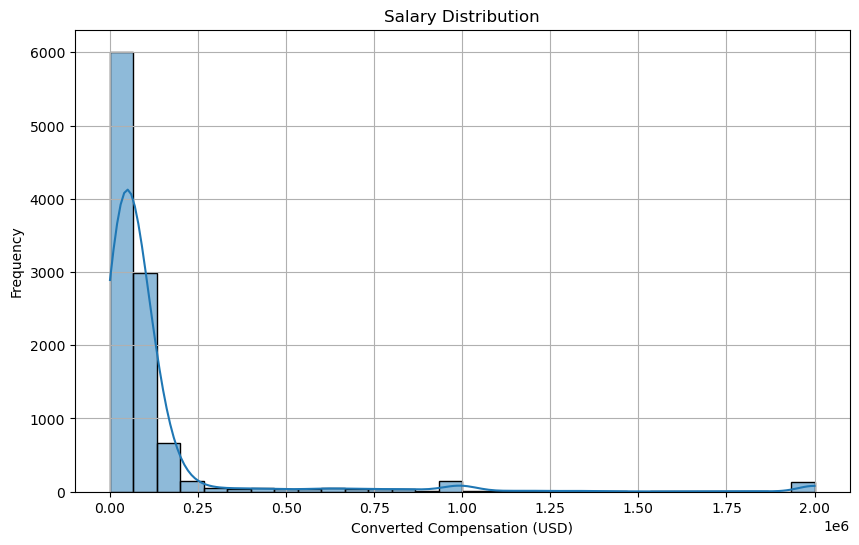

In [4]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ConvertedComp', bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
import numpy as np
# Remove rows with missing or non-numeric values in the 'ConvertedComp' column
cleaned_df = df.dropna(subset=['ConvertedComp'])
converted_comp_values = cleaned_df['ConvertedComp']

median_converted_comp = np.median(converted_comp_values)
print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
man_count = df['Gender'].value_counts().get('Man', 0)
print("Number of responders identified as 'Man':", man_count)

Number of responders identified as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# Filter the DataFrame for responders identified as "Woman" and without missing values in 'ConvertedComp'
woman_df = df[(df['Gender'] == 'Woman') & (~df['ConvertedComp'].isnull())]

# Calculate the median ConvertedComp for responders identified as "Woman"
median_woman_comp = np.median(woman_df['ConvertedComp'])
print("Median ConvertedComp for responders identified as 'Woman':", median_woman_comp)

Median ConvertedComp for responders identified as 'Woman': 57708.0


Give the five number summary for the column `Age`?


In [16]:
# Drop rows with missing Age values
cleaned_df = df.dropna(subset=['Age'])
age_values = cleaned_df['Age']

minimum = np.min(age_values)
q1 = np.percentile(age_values, 25)
median = np.median(age_values)
q3 = np.percentile(age_values, 75)
maximum = np.max(age_values)

print("Five-Number Summary for Age:")
print("Minimum:", minimum)
print("Q1:", q1)
print("Median:", median)
print("Q3:", q3)
print("Maximum:", maximum)

Five-Number Summary for Age:
Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


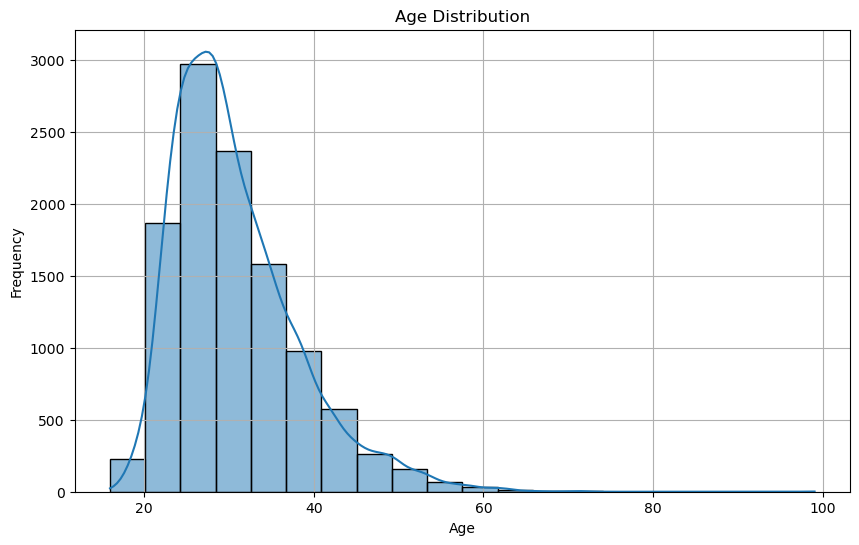

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


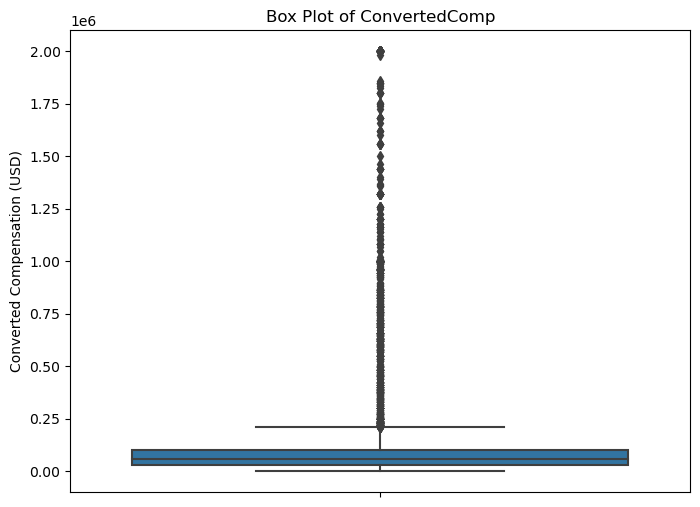

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='ConvertedComp')
plt.title('Box Plot of ConvertedComp')
plt.ylabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# Remove rows with missing or non-numeric values in the 'ConvertedComp' column
cleaned_df = df.dropna(subset=['ConvertedComp'])
converted_comp_values = cleaned_df['ConvertedComp']

q1 = np.percentile(converted_comp_values, 25)
q3 = np.percentile(converted_comp_values, 75)

iqr = q3 - q1

print("Interquartile Range (IQR) for ConvertedComp:", iqr)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [18]:
converted_comp_values = df['ConvertedComp'].dropna()  # Remove missing values if any

q1 = np.percentile(converted_comp_values, 25)
q3 = np.percentile(converted_comp_values, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
outliers_count = len(df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)])

print("Number of outliers in the ConvertedComp column:", outliers_count)

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
# Create a new DataFrame by removing outliers
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Now 'filtered_df' contains data with outliers removed

# You can optionally reset the index if needed
filtered_df.reset_index(drop=True, inplace=True)

# Print the number of rows in the filtered DataFrame
print("Number of rows in the filtered DataFrame:", len(filtered_df))

Number of rows in the filtered DataFrame: 9703


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values between 'Age' and all other numerical columns
age_correlations = correlation_matrix['Age'].drop('Age')

print("Correlation between Age and other numerical columns:")
print(age_correlations)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
